## 📊 PHẦN 1: THỐNG KÊ DỮ LIỆU (Data Statistics)

### Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('default')
sns.set_palette("husl")

### Đọc dữ liệu

In [3]:
df = pd.read_csv('heart.csv')
print("TỔNG QUAN DỮ LIỆU")
print("=" * 50)
print(f"Kích thước dataset: {df.shape}")
print(f"Số lượng mẫu: {df.shape[0]}")
print(f"Số lượng đặc trưng: {df.shape[1]}")

TỔNG QUAN DỮ LIỆU
Kích thước dataset: (1025, 14)
Số lượng mẫu: 1025
Số lượng đặc trưng: 14


### Hiển thị thông tin cơ bản về dataset

In [4]:
print("THÔNG TIN CƠ BẢN")
print("=" * 50)
df.info()

THÔNG TIN CƠ BẢN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
print("MÔ TẢ THỐNG KÊ")
print("=" * 50)
df.describe()

MÔ TẢ THỐNG KÊ


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Kiểm tra dữ liệu thiếu

In [8]:
print("KIỂM TRA DỮ LIỆU THIẾU")
print("=" * 50)
missing_data = df.isnull().sum()
for col, missing in missing_data.items():
    print(f"{col}: {missing}")

KIỂM TRA DỮ LIỆU THIẾU
age: 0
sex: 0
cp: 0
trestbps: 0
chol: 0
fbs: 0
restecg: 0
thalach: 0
exang: 0
oldpeak: 0
slope: 0
ca: 0
thal: 0
target: 0


### Phân tích biến mục tiêu (Target Variable)

In [9]:
print("PHÂN TÍCH BIẾN MỤC TIÊU")
print("=" * 50)
target_counts = df['target'].value_counts()
print("Phân bố lớp:")
print(f"Không có bệnh tim (0): {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"Có bệnh tim (1): {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")

PHÂN TÍCH BIẾN MỤC TIÊU
Phân bố lớp:
Không có bệnh tim (0): 499 (48.7%)
Có bệnh tim (1): 526 (51.3%)


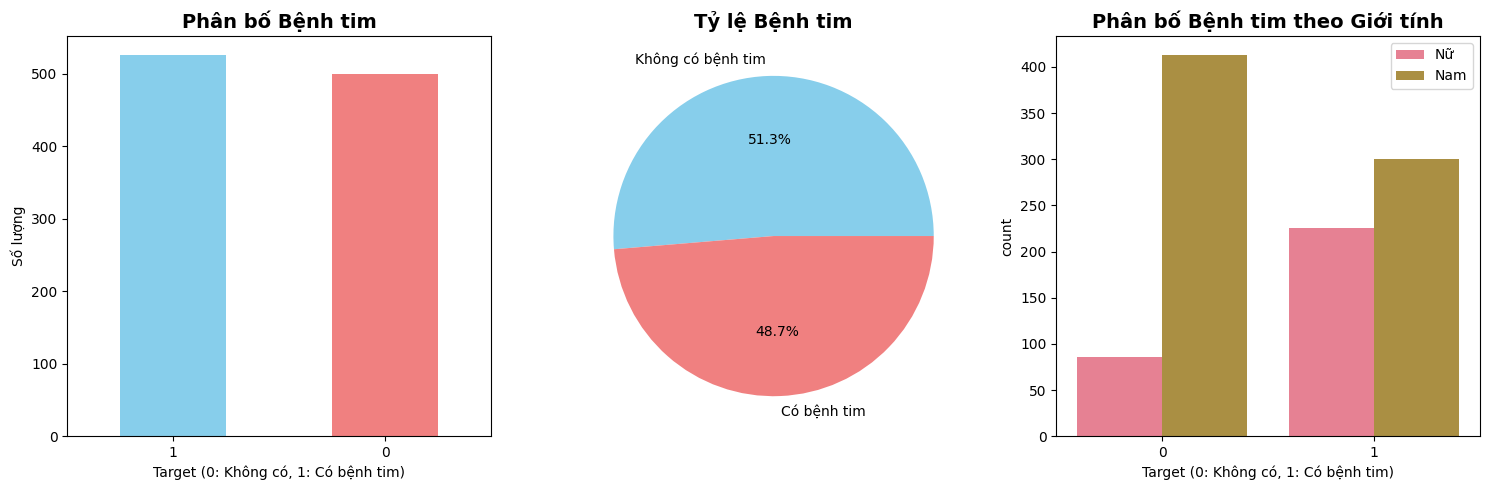

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
target_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Phân bố Bệnh tim', fontsize=14, fontweight='bold')
plt.xlabel('Target (0: Không có, 1: Có bệnh tim)')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
plt.pie(target_counts.values, labels=['Không có bệnh tim', 'Có bệnh tim'], 
        autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Tỷ lệ Bệnh tim', fontsize=14, fontweight='bold')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='target', hue='sex')
plt.title('Phân bố Bệnh tim theo Giới tính', fontsize=14, fontweight='bold')
plt.xlabel('Target (0: Không có, 1: Có bệnh tim)')
plt.legend(['Nữ', 'Nam'])

plt.tight_layout()
plt.show()

### Phân tích các biến số

In [12]:
print("PHÂN TÍCH CÁC BIẾN SỐ")

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

PHÂN TÍCH CÁC BIẾN SỐ


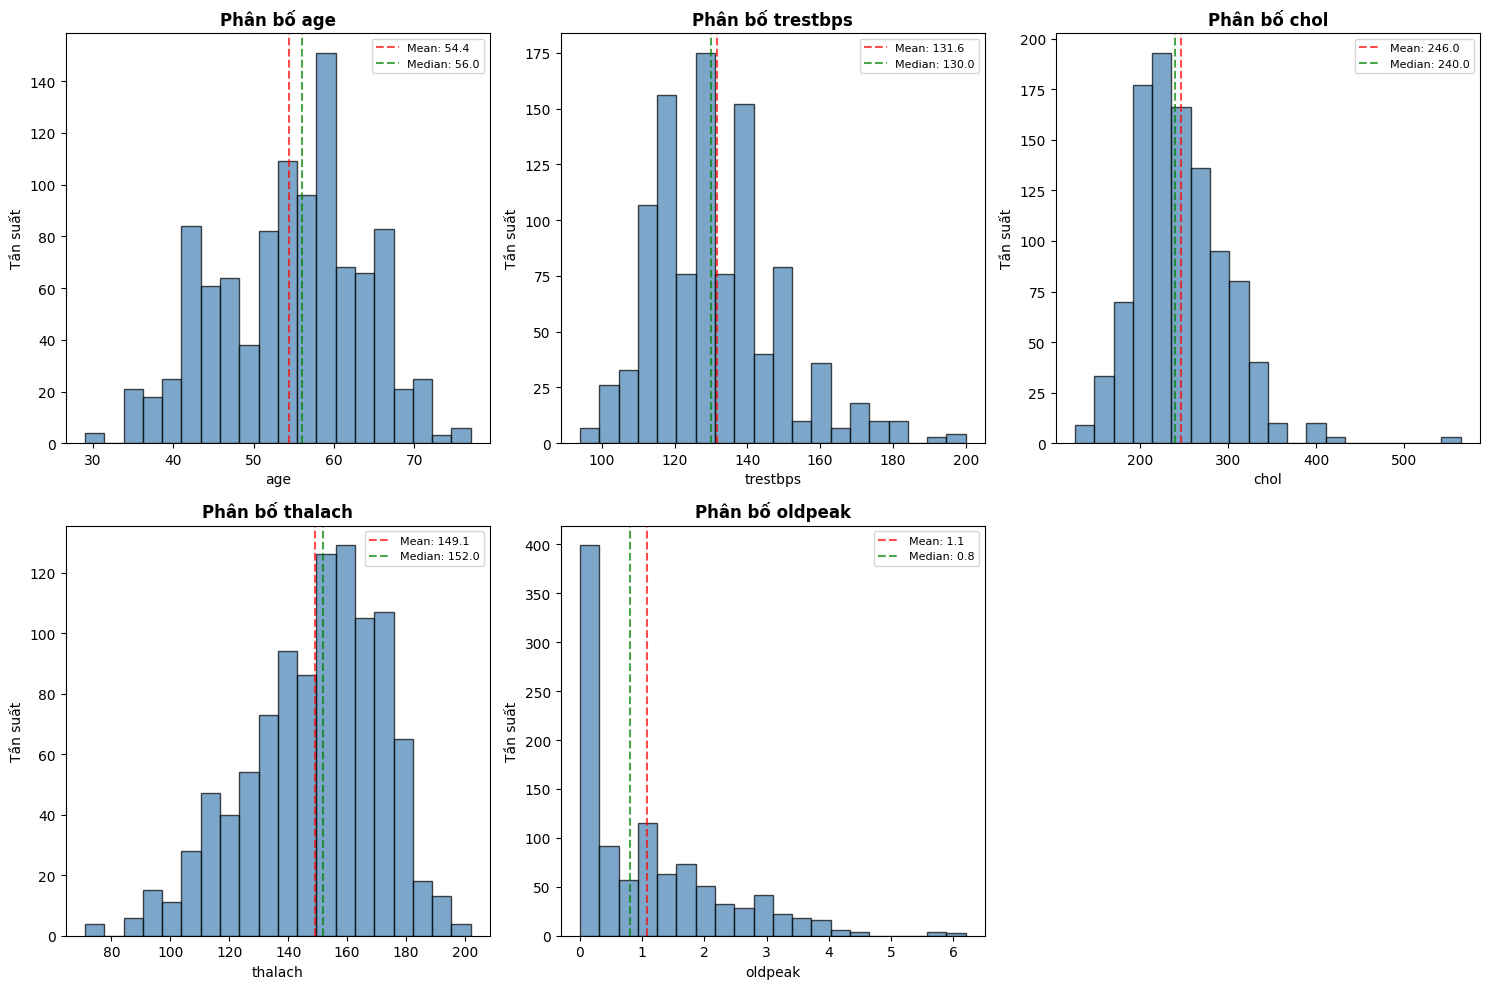

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    plt.hist(df[col], bins=20, alpha=0.7, color='steelblue', edgecolor='black')
    plt.title(f'Phân bố {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.1f}')
    plt.axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.1f}')
    plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

### Phân tích các biến phân loại

In [14]:
print("PHÂN TÍCH CÁC BIẾN PHÂN LOẠI")

PHÂN TÍCH CÁC BIẾN PHÂN LOẠI


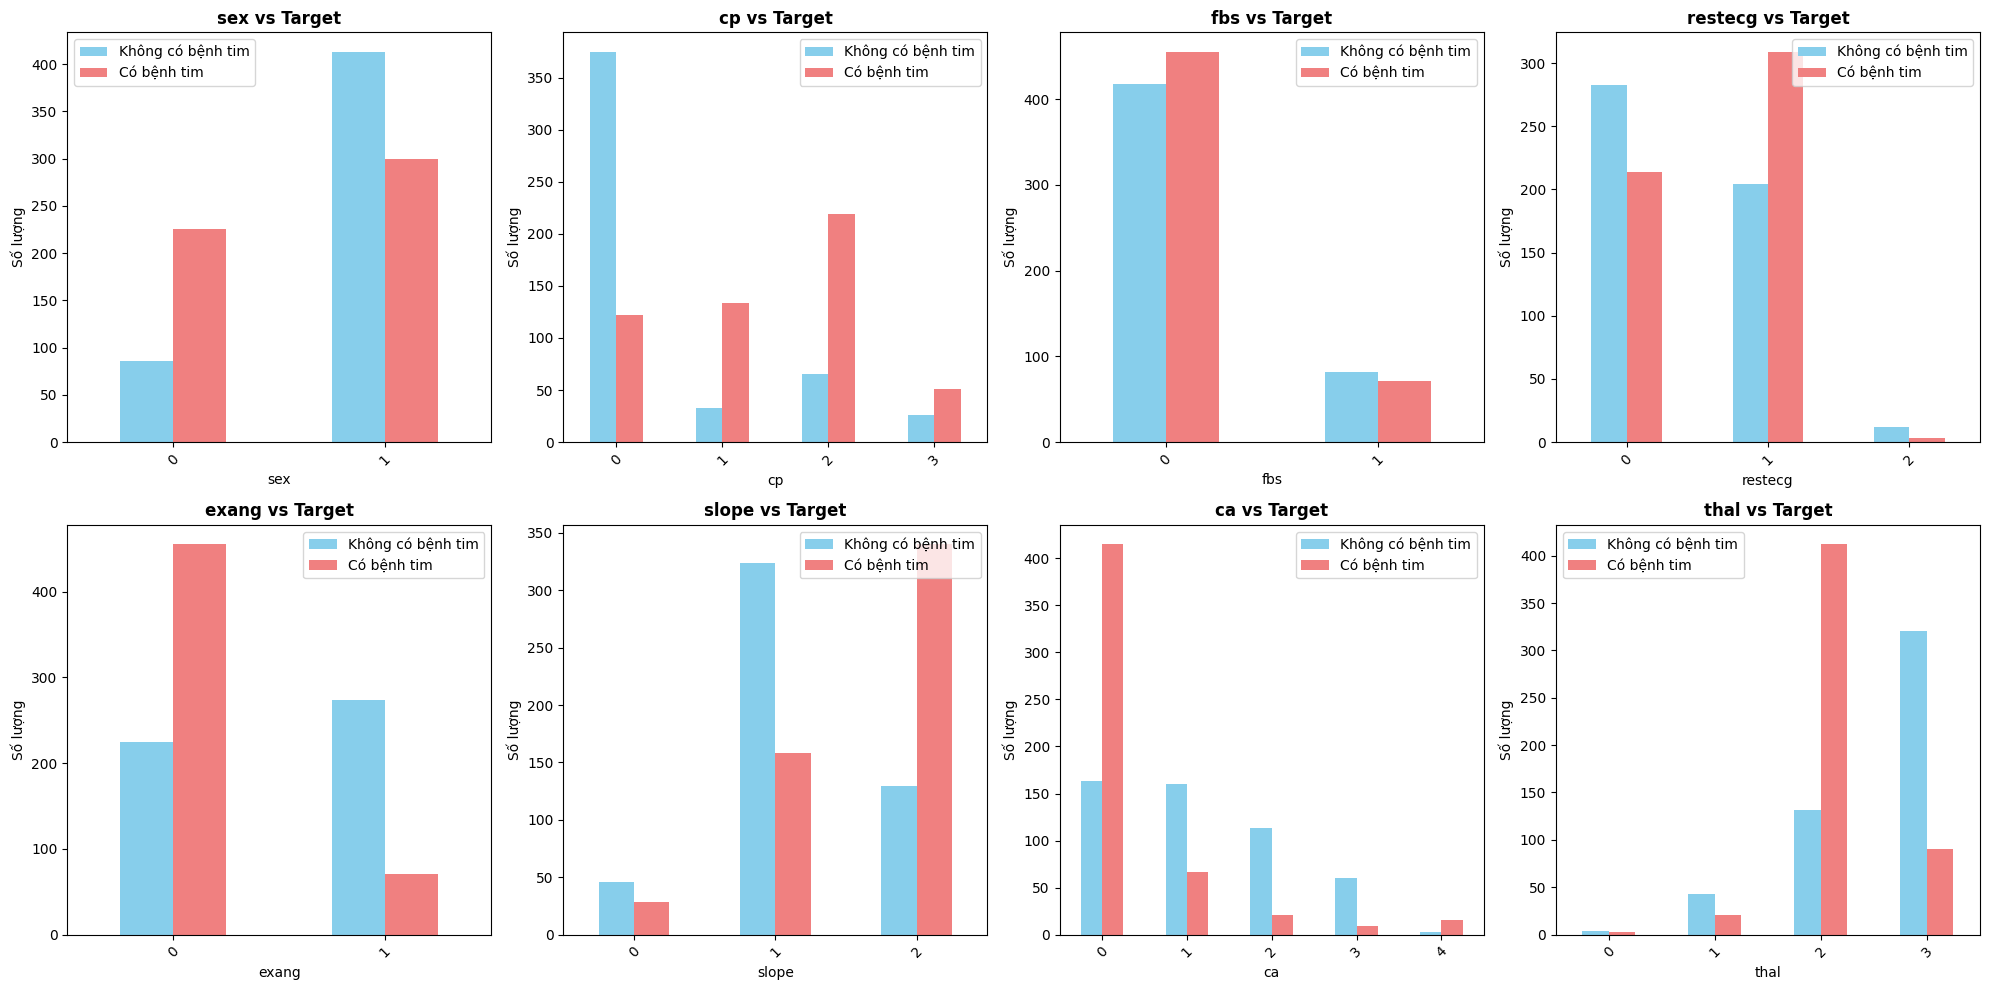

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    cross_tab = pd.crosstab(df[col], df['target'])
    cross_tab.plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral'])
    axes[i].set_title(f'{col} vs Target', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Số lượng')
    axes[i].legend(['Không có bệnh tim', 'Có bệnh tim'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Ma trận tương quan

In [16]:
print("MA TRẬN TƯƠNG QUAN")

MA TRẬN TƯƠNG QUAN


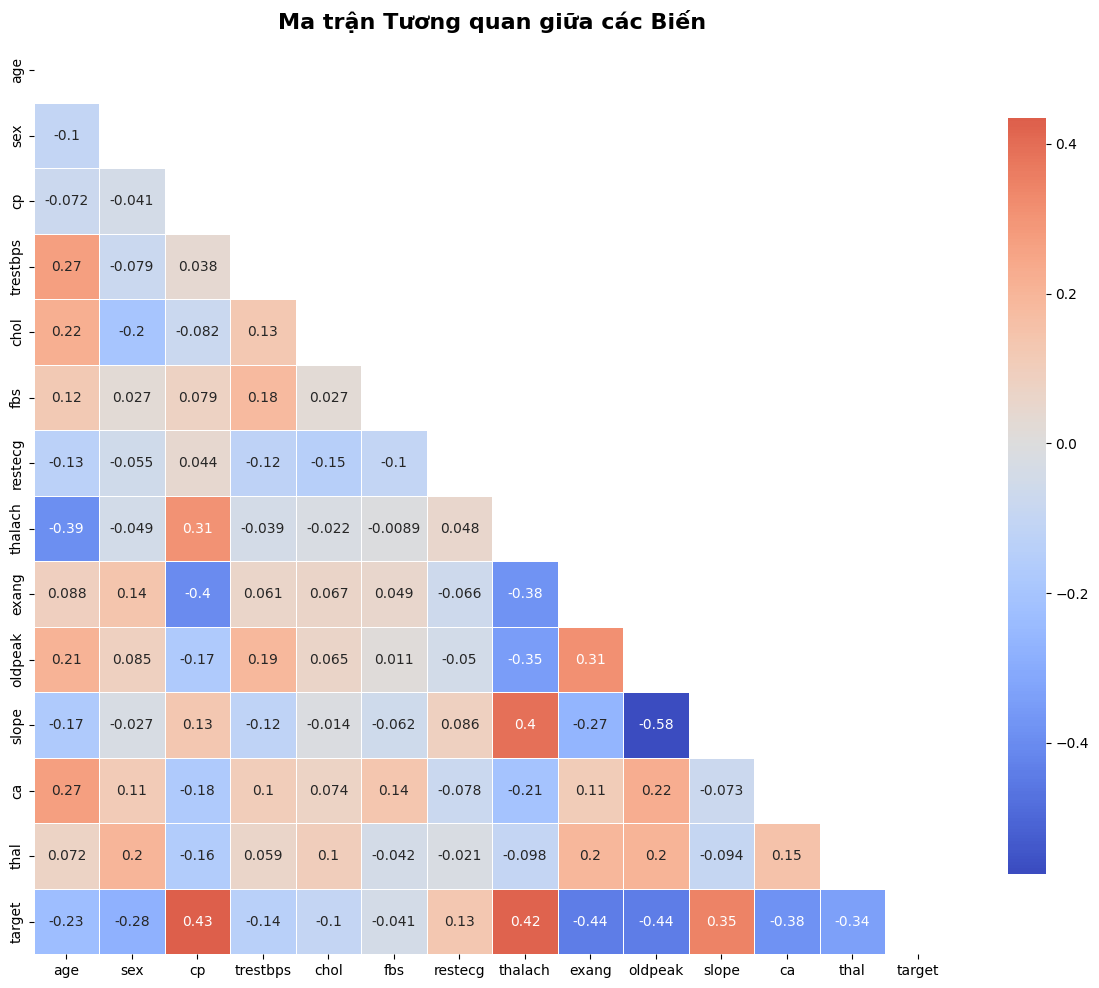

Tương quan với biến Target (theo độ lớn):
oldpeak: 0.438
exang: 0.438
cp: 0.435
thalach: 0.423
ca: 0.382
slope: 0.346
thal: 0.338
sex: 0.280
age: 0.229
trestbps: 0.139
restecg: 0.134
chol: 0.100
fbs: 0.041


In [17]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Ma trận Tương quan giữa các Biến', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

target_corr = correlation_matrix['target'].abs().sort_values(ascending=False)
print("Tương quan với biến Target (theo độ lớn):")
for feature, corr in target_corr.items():
    if feature != 'target':
        print(f"{feature}: {corr:.3f}")

## 🔧 PHẦN 2: XỬ LÝ DỮ LIỆU (Data Preprocessing)

In [18]:
print("PHẦN 2: XỬ LÝ DỮ LIỆU")

PHẦN 2: XỬ LÝ DỮ LIỆU


### Kiểm tra và xử lý outliers

In [19]:
print("KIỂM TRA OUTLIERS")

KIỂM TRA OUTLIERS


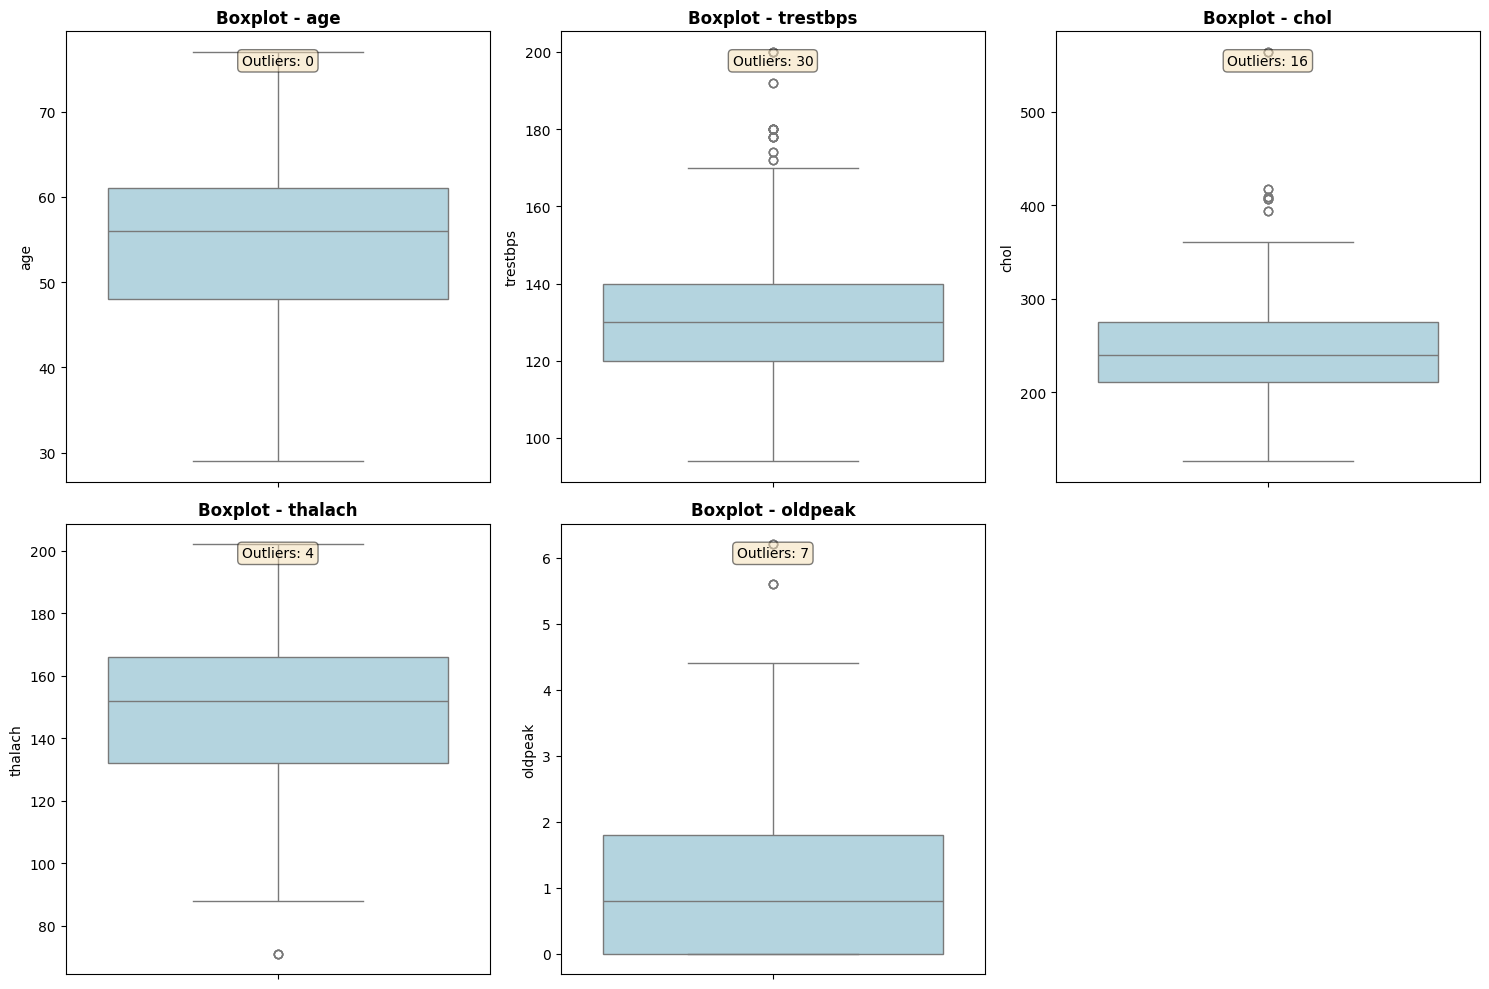

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot - {col}', fontsize=12, fontweight='bold')
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    plt.text(0.5, 0.95, f'Outliers: {len(outliers)}', transform=plt.gca().transAxes, 
             ha='center', va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

### Xử lý outliers (sử dụng phương pháp IQR)

In [21]:
print("XỬ LÝ OUTLIERS")
print("=" * 50)

df_processed = df.copy()
outliers_info = {}

rows_to_keep = pd.Series(True, index=df_processed.index)

for col in numerical_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_mask = (df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)
    outliers_before = outliers_mask.sum()
    
    rows_to_keep = rows_to_keep & ~outliers_mask
    
    outliers_info[col] = outliers_before

df_processed = df_processed[rows_to_keep]

print("Số lượng outliers đã được xử lý (theo cột):")
for col, count in outliers_info.items():
    print(f"{col}: {count} outliers")

print(f"\nTổng số hàng trước khi xóa: {len(df)}")
print(f"Tổng số hàng sau khi xóa: {len(df_processed)}")
print(f"Số hàng đã bị xóa: {len(df) - len(df_processed)}")
print("\nHoàn thành xử lý dữ liệu!")

XỬ LÝ OUTLIERS
Số lượng outliers đã được xử lý (theo cột):
age: 0 outliers
trestbps: 30 outliers
chol: 16 outliers
thalach: 4 outliers
oldpeak: 7 outliers

Tổng số hàng trước khi xóa: 1025
Tổng số hàng sau khi xóa: 968
Số hàng đã bị xóa: 57

Hoàn thành xử lý dữ liệu!


### Feature Engineering

### Chia tách dữ liệu

In [22]:
print("CHIA TÁCH DỮ LIỆU")
print("=" * 50)

feature_cols = [col for col in df.columns if col != 'target']
X = df_processed[feature_cols]
y = df_processed['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")
print(f"Tỷ lệ target trong train: {y_train.value_counts(normalize=True).round(3).to_dict()}")
print(f"Tỷ lệ target trong test: {y_test.value_counts(normalize=True).round(3).to_dict()}")

CHIA TÁCH DỮ LIỆU
Kích thước tập train: (774, 13)
Kích thước tập test: (194, 13)
Tỷ lệ target trong train: {1: 0.525, 0: 0.475}
Tỷ lệ target trong test: {1: 0.526, 0: 0.474}


### Phân loại các loại features

In [25]:
print("PHÂN LOẠI CÁC LOẠI FEATURES")

numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
nominal_features = ['sex', 'fbs', 'exang']
ordinal_features = ['cp', 'restecg', 'slope', 'ca', 'thal']

PHÂN LOẠI CÁC LOẠI FEATURES


### Chuẩn hóa dữ liệu theo từng loại

In [26]:
print("CHUẨN HÓA DỮ LIỆU THEO TỪNG LOẠI")
print("=" * 50)

ordinal_categories = [
    [0, 1, 2, 3],           # cp: 0=typical angina, 1=atypical angina, 2=non-anginal pain, 3=asymptomatic
    [0, 1, 2],              # restecg: 0=normal, 1=ST-T abnormality, 2=left ventricular hypertrophy
    [0, 1, 2],              # slope: 1=upsloping, 2=flat, 3=downsloping
    [0, 1, 2, 3, 4],           # ca: 0, 1, 2, 3 major vessels
    [0, 1, 2, 3]               # thal: 1=normal, 2=fixed defect, 3=reversible defect
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('nom', 'passthrough', nominal_features),
        ('ord', OrdinalEncoder(categories=ordinal_categories, dtype=np.int64), ordinal_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

nom_encoder = pipeline.named_steps['preprocessor'].named_transformers_['nom']
nom_feature_names = nom_encoder.get_feature_names_out(nominal_features)
feature_names = numeric_features + list(nom_feature_names) + ordinal_features

X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

CHUẨN HÓA DỮ LIỆU THEO TỪNG LOẠI


In [29]:
print("THỐNG KÊ SAU XỬ LÝ:")
print("=" * 50)

X_train_processed.head()

THỐNG KÊ SAU XỬ LÝ:


,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,restecg,slope,ca,thal
762,0.211346,-0.016755,-0.477168,0.595909,-0.924949,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0
850,0.434057,-0.668439,0.900840,0.463472,0.783895,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
394,0.990835,-0.016755,1.907005,-0.772606,0.783895,1.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0
680,-1.347634,-0.668439,1.141445,0.551764,-0.924949,1.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0
19,0.434057,0.634929,-0.695899,0.684201,-0.924949,1.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0


MA TRẬN TƯƠNG QUAN SAU XỬ LÝ


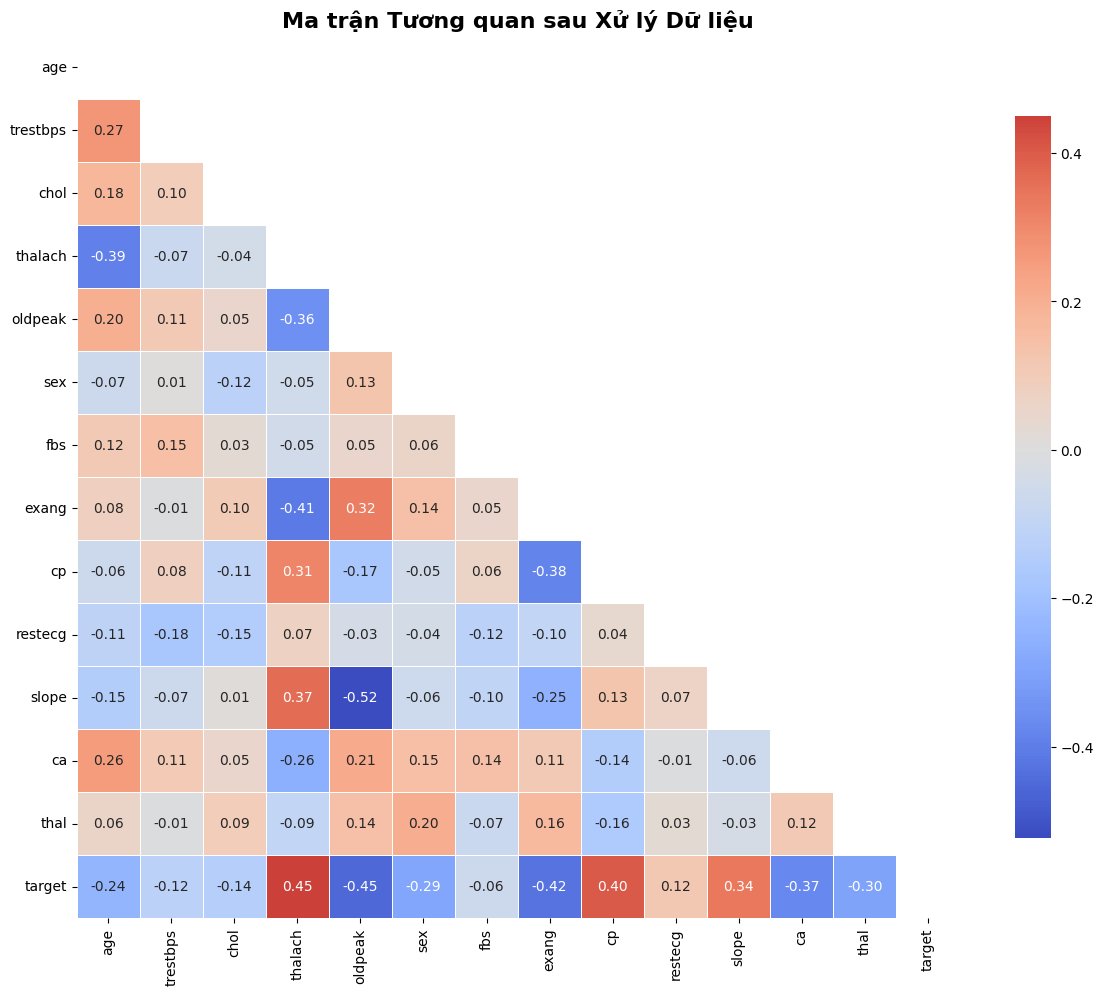

So sánh tương quan với Target:
Feature              Before   After    Change  
--------------------------------------------------
oldpeak              0.438    0.453    +0.014
exang                0.438    0.424    -0.014
cp                   0.435    0.402    -0.033
thalach              0.423    0.450    +0.027
ca                   0.382    0.373    -0.009
slope                0.346    0.338    -0.008
thal                 0.338    0.299    -0.039
sex                  0.280    0.289    +0.009
age                  0.229    0.244    +0.014
trestbps             0.139    0.117    -0.022
restecg              0.134    0.116    -0.019
chol                 0.100    0.139    +0.039
fbs                  0.041    0.064    +0.023


In [30]:
print("MA TRẬN TƯƠNG QUAN SAU XỬ LÝ")
print("=" * 50)

plt.figure(figsize=(12, 10))
correlation_matrix_processed = pd.concat([X_train_processed, y_train], axis=1).corr()
mask = np.triu(np.ones_like(correlation_matrix_processed, dtype=bool))
sns.heatmap(correlation_matrix_processed, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Ma trận Tương quan sau Xử lý Dữ liệu', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

target_corr_before = correlation_matrix['target'].abs().sort_values(ascending=False)
target_corr_after = correlation_matrix_processed['target'].abs().sort_values(ascending=False)

print("So sánh tương quan với Target:")
print(f"{'Feature':<20} {'Before':<8} {'After':<8} {'Change':<8}")
print("-" * 50)
for feat in target_corr_before.index:
    if feat != 'target':
        before_val = target_corr_before[feat]
        after_val = target_corr_after.get(feat, 0)
        change = after_val - before_val
        print(f"{feat:<20} {before_val:.3f}    {after_val:.3f}    {change:+.3f}")

X_train_scaled = X_train_processed
X_test_scaled = X_test_processed

In [31]:
X_train_scaled = X_train_processed
X_test_scaled = X_test_processed

## 🤖 PHẦN 3: HUẤN LUYỆN MÔ HÌNH (Model Training)

In [32]:
print("PHẦN 3: HUẤN LUYỆN MÔ HÌNH")

PHẦN 3: HUẤN LUYỆN MÔ HÌNH


### Khởi tạo các mô hình


In [34]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True)
}

### Huấn luyện và đánh giá các mô hình

In [35]:
print("HUẤN LUYỆN VÀ ĐÁNH GIÁ")
print("=" * 50)

results = {}
model_objects = {}

for name, model in models.items():
    print(f"\n🔄 Đang huấn luyện {name}...")
    
    model.fit(X_train_scaled, y_train)
    model_objects[name] = model
    
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"✅ {name} - Accuracy: {accuracy:.4f}")

HUẤN LUYỆN VÀ ĐÁNH GIÁ

🔄 Đang huấn luyện Logistic Regression...
✅ Logistic Regression - Accuracy: 0.8608

🔄 Đang huấn luyện Random Forest...
✅ Random Forest - Accuracy: 1.0000

🔄 Đang huấn luyện Support Vector Machine...
✅ Support Vector Machine - Accuracy: 0.8969


### So sánh kết quả các mô hình


📊 SO SÁNH KẾT QUẢ


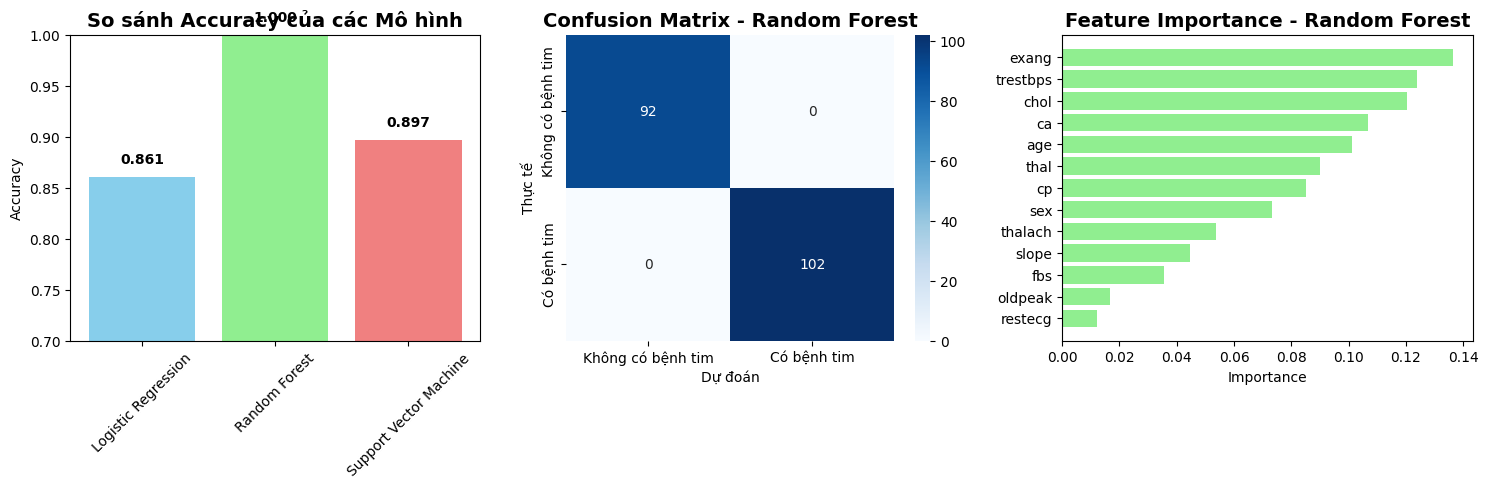

In [36]:
print("\n📊 SO SÁNH KẾT QUẢ")
print("=" * 50)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('So sánh Accuracy của các Mô hình', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)

best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_predictions = results[best_model_name]['predictions']

plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Không có bệnh tim', 'Có bệnh tim'],
            yticklabels=['Không có bệnh tim', 'Có bệnh tim'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')

if 'Random Forest' in model_objects:
    plt.subplot(1, 3, 3)
    rf_model = model_objects['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    plt.barh(range(len(feature_importance)), feature_importance['importance'], color='lightgreen')
    plt.yticks(range(len(feature_importance)), feature_importance['feature'])
    plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
    plt.xlabel('Importance')

plt.tight_layout()
plt.show()

### Báo cáo chi tiết cho mô hình tốt nhất

In [37]:
print(f"MÔ HÌNH TỐT NHẤT: {best_model_name}")
print("=" * 50)
print(f"Accuracy: {results[best_model_name]['accuracy']:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, best_predictions, 
                          target_names=['Không có bệnh tim', 'Có bệnh tim']))

MÔ HÌNH TỐT NHẤT: Random Forest
Accuracy: 1.0000

Classification Report:
                   precision    recall  f1-score   support

Không có bệnh tim       1.00      1.00      1.00        92
      Có bệnh tim       1.00      1.00      1.00       102

         accuracy                           1.00       194
        macro avg       1.00      1.00      1.00       194
     weighted avg       1.00      1.00      1.00       194



### Feature Importance Analysis

In [38]:
if 'Random Forest' in model_objects:
    print("PHÂN TÍCH ĐỘ QUAN TRỌNG CỦA CÁC ĐẶC TRƯNG")
    print("=" * 50)
    
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': model_objects['Random Forest'].feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top 10 đặc trưng quan trọng nhất:")
    for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
        print(f"{i:2d}. {row['Feature']:12s}: {row['Importance']:.4f}")

PHÂN TÍCH ĐỘ QUAN TRỌNG CỦA CÁC ĐẶC TRƯNG
Top 10 đặc trưng quan trọng nhất:
 1. exang       : 0.1365
 2. trestbps    : 0.1239
 3. chol        : 0.1206
 4. ca          : 0.1069
 5. age         : 0.1012
 6. thal        : 0.0901
 7. cp          : 0.0852
 8. sex         : 0.0733
 9. thalach     : 0.0536
10. slope       : 0.0447


### Kết luận

In [ ]:
import joblib
import pickle
import json
from datetime import datetime
import os

print("XUẤT MÔ HÌNH TỐT NHẤT")
print("=" * 50)

best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_model = model_objects[best_model_name]
best_accuracy = results[best_model_name]['accuracy']

print(f"Mô hình tốt nhất: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")

model_dir = "saved_models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_filename = f"{model_dir}/best_heart_disease_model.joblib"
joblib.dump(best_model, model_filename)
print(f"Đã lưu mô hình: {model_filename}")

scaler_filename = f"{model_dir}/feature_scaler.joblib"
joblib.dump(pipeline, scaler_filename)
print(f"Đã lưu scaler: {scaler_filename}")

model_info = {
    'model_name': best_model_name,
    'accuracy': float(best_accuracy),
    'training_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'feature_names': list(X_train.columns),
    'model_parameters': best_model.get_params(),
    'data_shape': {
        'training_samples': X_train.shape[0],
        'features': X_train.shape[1],
        'test_samples': X_test.shape[0]
    }
}

info_filename = f"{model_dir}/model_info.json"
with open(info_filename, 'w', encoding='utf-8') as f:
    json.dump(model_info, f, indent=2, ensure_ascii=False)
print(f"Đã lưu thông tin mô hình: {info_filename}")

print(f"\nTất cả files đã được lưu trong thư mục: {model_dir}/")
print("Danh sách files:")
for file in os.listdir(model_dir):
    file_path = os.path.join(model_dir, file)
    file_size = os.path.getsize(file_path)
    print(f"   • {file} ({file_size} bytes)")

print(f"\n✨ Xuất mô hình hoàn tất! Bạn có thể sử dụng mô hình này cho dự đoán trong tương lai.")

XUẤT MÔ HÌNH TỐT NHẤT
Mô hình tốt nhất: Random Forest
Accuracy: 1.0000
Đã lưu mô hình: saved_models/best_heart_disease_model.joblib
Đã lưu scaler: saved_models/feature_scaler.joblib
Đã lưu thông tin mô hình: saved_models/model_info.json

Tất cả files đã được lưu trong thư mục: saved_models/
Danh sách files:
   • feature_scaler.joblib (3767 bytes)
   • model_info.json (898 bytes)
   • best_heart_disease_model.joblib (1147561 bytes)

✨ Xuất mô hình hoàn tất! Bạn có thể sử dụng mô hình này cho dự đoán trong tương lai.
